# Covid Cases Prediction

In [53]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
#Loading Data from W.H.O API
daily_data = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])

In [3]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
177745,2022-01-17,ZW,Zimbabwe,AFRO,144,226078,4,5247
177746,2022-01-18,ZW,Zimbabwe,AFRO,382,226460,11,5258
177747,2022-01-19,ZW,Zimbabwe,AFRO,427,226887,8,5266
177748,2022-01-20,ZW,Zimbabwe,AFRO,0,226887,0,5266


In [4]:
#Sorting based on the date, in reverese chronological order
daily_data.sort_values(by='Date_reported', ascending=True, inplace=True)
daily_data.reset_index(drop=True, inplace=True)

In [5]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-03,PR,Puerto Rico,AMRO,0,0,0,0
2,2020-01-03,FK,Falkland Islands (Malvinas),AMRO,0,0,0,0
3,2020-01-03,IL,Israel,EURO,0,0,0,0
4,2020-01-03,FM,Micronesia (Federated States of),WPRO,0,0,0,0
...,...,...,...,...,...,...,...,...
177745,2022-01-21,VC,Saint Vincent and the Grenadines,AMRO,11,6615,2,90
177746,2022-01-21,CU,Cuba,AMRO,3195,1011811,4,8352
177747,2022-01-21,WS,Samoa,WPRO,10,12,0,0
177748,2022-01-21,CZ,Czechia,EURO,26907,2705754,11,36997


In [6]:
#filtering only UK data
uk_data = daily_data[daily_data['Country'] == 'The United Kingdom']
uk_data.reset_index(drop=True, inplace=True)

In [9]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022
746,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022
747,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022
748,2022-01-20,GB,The United Kingdom,EURO,107450,15506754,359,152872,20,1,2022


In [8]:
#splitting date into day, month and year
uk_data['Day'] = uk_data['Date_reported'].dt.day
uk_data['Month'] = uk_data['Date_reported'].dt.month
uk_data['Year'] = uk_data['Date_reported'].dt.year

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Day'] = uk_data['Date_reported'].dt.day
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Month'] = uk_data['Date_reported'].dt.month
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

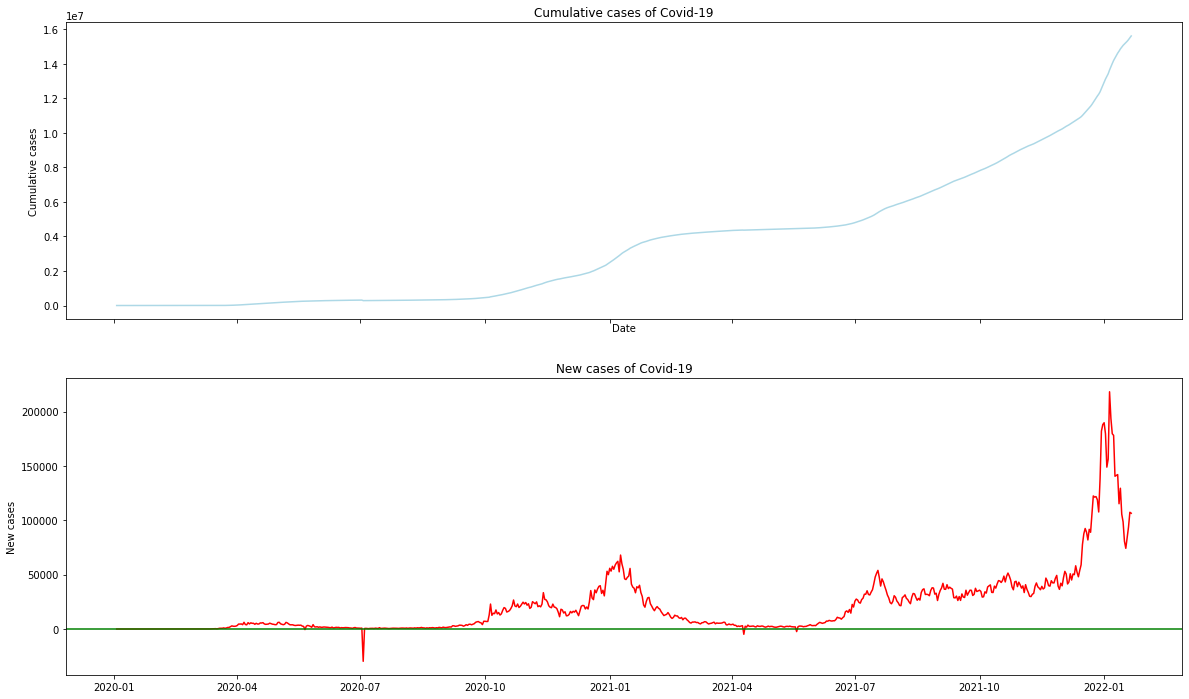

In [10]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_xlabel('Date')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

Found negative values in new cases, which can not happen, maybe it can be the number of people recovered from covid. But we don't have enough data to produce recovered stats in all the samples. negative new cases are zeroed and cumulative cases are recalculated.

In [11]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022
746,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022
747,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022
748,2022-01-20,GB,The United Kingdom,EURO,107450,15506754,359,152872,20,1,2022


In [12]:
#Finding negative new cases
uk_data[uk_data['New_cases'] < 0]['New_cases'].index

Int64Index([139, 182, 463, 502], dtype='int64')

In [13]:
uk_data['New_cases'].loc[uk_data[uk_data['New_cases'] < 0]['New_cases'].index] = 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
uk_data[uk_data['New_cases'] < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year


In [15]:
uk_data['cumsum'] = uk_data['New_cases'].cumsum()

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/2731571578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['cumsum'] = uk_data['New_cases'].cumsum()


In [16]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year,cumsum
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020,0
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020,0
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020,0
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020,0
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022,15258460
746,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022,15342889
747,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022,15436779
748,2022-01-20,GB,The United Kingdom,EURO,107450,15506754,359,152872,20,1,2022,15544229


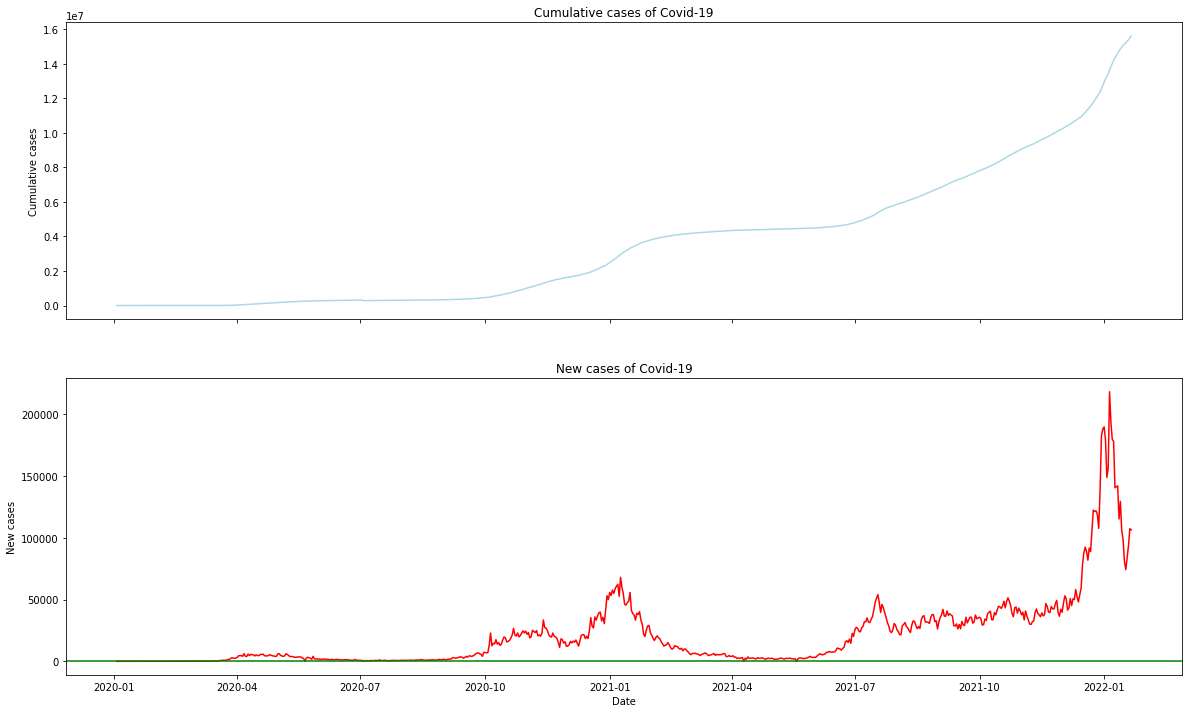

In [18]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].set_xlabel('Date')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

In [19]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year,cumsum
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020,0
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020,0
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020,0
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020,0
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022,15258460
746,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022,15342889
747,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022,15436779
748,2022-01-20,GB,The United Kingdom,EURO,107450,15506754,359,152872,20,1,2022,15544229


In [20]:
uk_data['Cumulative_cases'] = uk_data['cumsum']
uk_data.drop('cumsum', axis=1, inplace=True)

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/4027653383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Cumulative_cases'] = uk_data['cumsum']
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15258460,91,151990,17,1,2022
746,2022-01-18,GB,The United Kingdom,EURO,84429,15342889,85,152075,18,1,2022
747,2022-01-19,GB,The United Kingdom,EURO,93890,15436779,438,152513,19,1,2022
748,2022-01-20,GB,The United Kingdom,EURO,107450,15544229,359,152872,20,1,2022


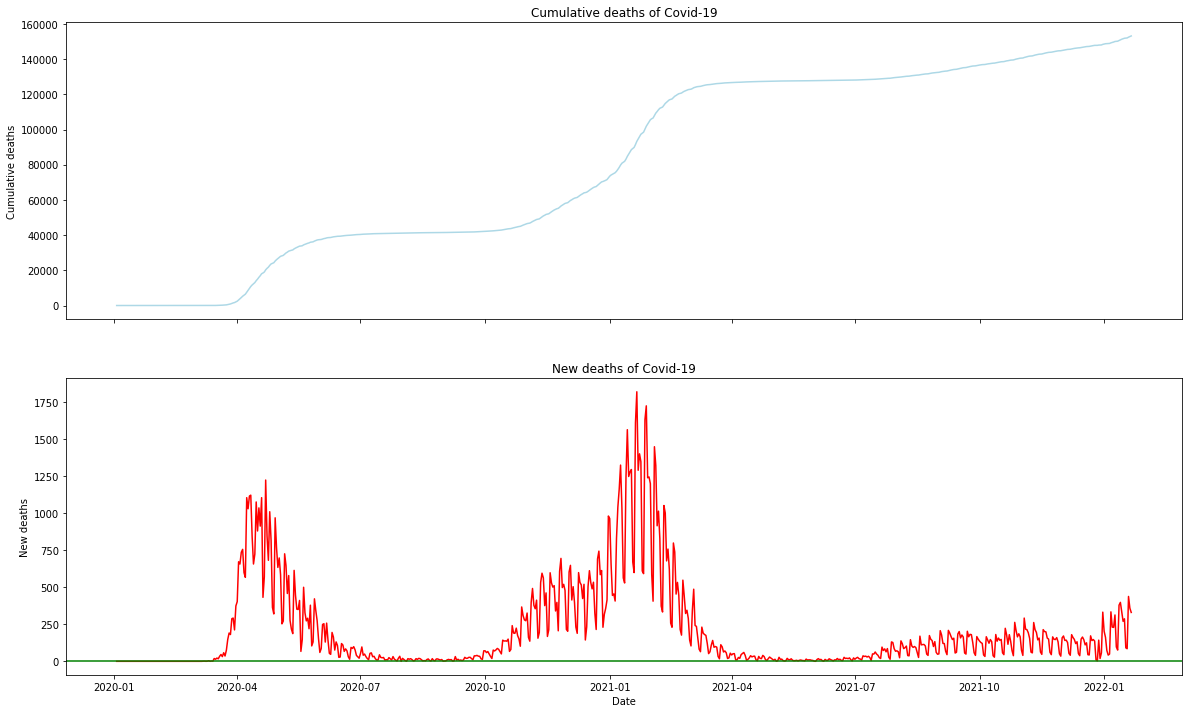

In [22]:
#Plotting the Cumulative and new deaths for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_deaths'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_deaths'], linestyle='-', color='red')

ax[0].set_title('Cumulative deaths of Covid-19')
ax[0].set_ylabel('Cumulative deaths')

ax[1].set_title('New deaths of Covid-19')
ax[1].set_ylabel('New deaths')
ax[1].set_xlabel('Date')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

In [23]:
X = uk_data[['Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'Day', 'Month', 'Year']]
y = uk_data['New_cases']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [28]:
X_train

,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,0,0,0,3,1,2020
1,0,0,0,4,1,2020
2,0,0,0,5,1,2020
3,0,0,0,6,1,2020
4,0,0,0,7,1,2020
...,...,...,...,...,...,...
595,6429639,113,131373,20,8,2021
596,6466626,114,131487,21,8,2021
597,6498409,104,131591,22,8,2021
598,6530385,49,131640,23,8,2021


In [29]:
X_test

,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
600,6592679,174,131854,25,8,2021
601,6628226,149,132003,26,8,2021
602,6666188,140,132143,27,8,2021
603,6703878,100,132243,28,8,2021
604,6735965,133,132376,29,8,2021
...,...,...,...,...,...,...
745,15258460,91,151990,17,1,2022
746,15342889,85,152075,18,1,2022
747,15436779,438,152513,19,1,2022
748,15544229,359,152872,20,1,2022


## Model Training

### Random Forest

In [31]:
RF =RandomForestRegressor()

In [32]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
RF.score(X_test, y_test)

-0.42062061691129937

### Hyperparameter tuning

In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [41]:
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.1s
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.1s
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.1s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=936; total time=   0.9s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=936; total time=   1.0s
[CV] END bootstrap=True, max_depth=73, max_features=sqrt, min_samples_leaf=53, min_samples_split=19, n_estimators=672; total time=   0.8s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_est

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                         

In [42]:
rf_random.score(X_test, y_test)

-0.8292269297813524

### Support Vector Machine

In [44]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-1.7201059885228691

### Linear Regression

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.41783107781197026

In [46]:
random_grid_lm = {'fit_intercept': [True, False],
                  'normalize': [True, False],
                  'positive': [True, False]}

### Hyperparameter tuning

In [47]:
lm_random = RandomizedSearchCV(estimator = lm, param_distributions = random_grid_lm, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [48]:
lm_random.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.0s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.0s
[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.0s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END .fit_intercept=True, normalize=False, positive=True; total time=   0.0s
[CV] END fit_intercept=True, normalize=False, positive=False; total time=   0.0s
[CV] END fit_intercept=True, normalize=False, positive=False; total time=   0.0s
[CV] END fit_intercept=True, normalize=False, positive=False; total time=   0.0s
[CV] END .fit_intercept=False, normalize=True, positive=True; total time=   0.0s
[CV] END .fit_intercept=False, normalize=True, positive=True; total time=   0.0s
[CV] END .fit_intercept=Fals

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

RandomizedSearchCV(cv=3, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'positive': [True, False]},
                   random_state=42, verbose=2)

In [49]:
lm_random.score(X_test, y_test)

-0.29024301392836516

### Observation so far
>The data is trained and tested with different models (Random Forest, Support Vector Machine, Linear Regression) either of the model performed well. it can be seen from the score. so decided to try some advanced algorithms. ARIMA is one of the advanced time series algorithm.

# Using ARIMA to solve the problem

In [54]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
745,2022-01-17,GB,The United Kingdom,EURO,74267,15258460,91,151990,17,1,2022
746,2022-01-18,GB,The United Kingdom,EURO,84429,15342889,85,152075,18,1,2022
747,2022-01-19,GB,The United Kingdom,EURO,93890,15436779,438,152513,19,1,2022
748,2022-01-20,GB,The United Kingdom,EURO,107450,15544229,359,152872,20,1,2022


In [55]:
arima_data = uk_data[['Date_reported', 'New_cases']].copy()

In [56]:
arima_data

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
745,2022-01-17,74267
746,2022-01-18,84429
747,2022-01-19,93890
748,2022-01-20,107450


In [57]:
arima_data.set_index('Date_reported', inplace=True)

In [58]:
arima_data

,New_cases
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
...,...
2022-01-17,74267
2022-01-18,84429
2022-01-19,93890


<AxesSubplot:xlabel='Date_reported'>

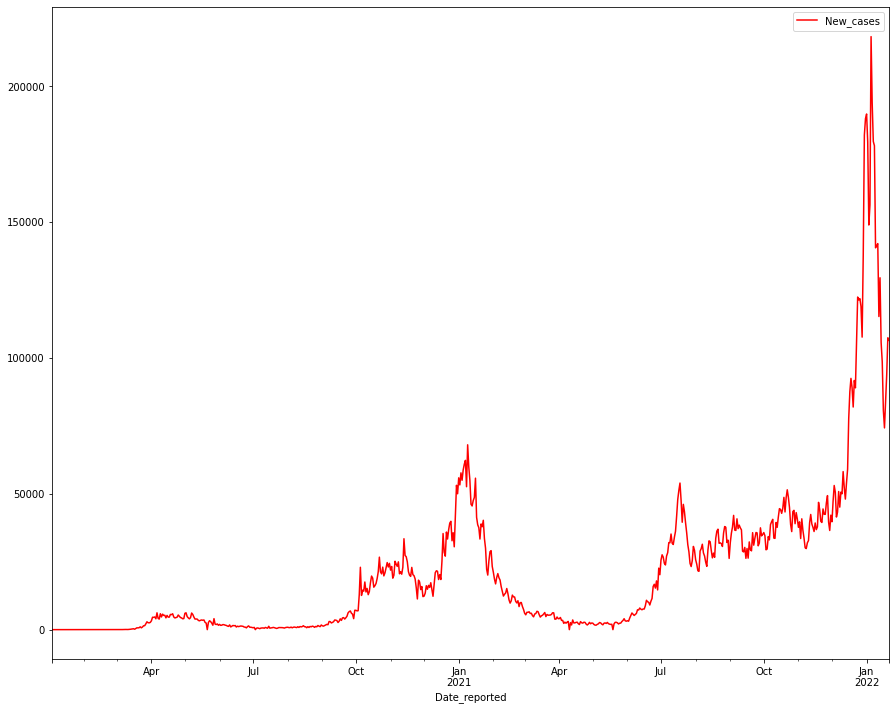

In [62]:
arima_data.plot(figsize=(15, 12), color='red')

In [63]:
from statsmodels.tsa.stattools import adfuller

In [69]:
result = adfuller(arima_data['New_cases'])
if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [70]:
arima_data['difference'] = arima_data['New_cases'] - arima_data['New_cases'].shift(1)

In [73]:
arima_data.dropna(inplace=True)

In [77]:
result = adfuller(arima_data['difference'])
if result[1] <= 0.05:
        print(f"{result[1]} strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
        print(f"{result[1]} weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

1.3775890136120388e-10 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date_reported'>

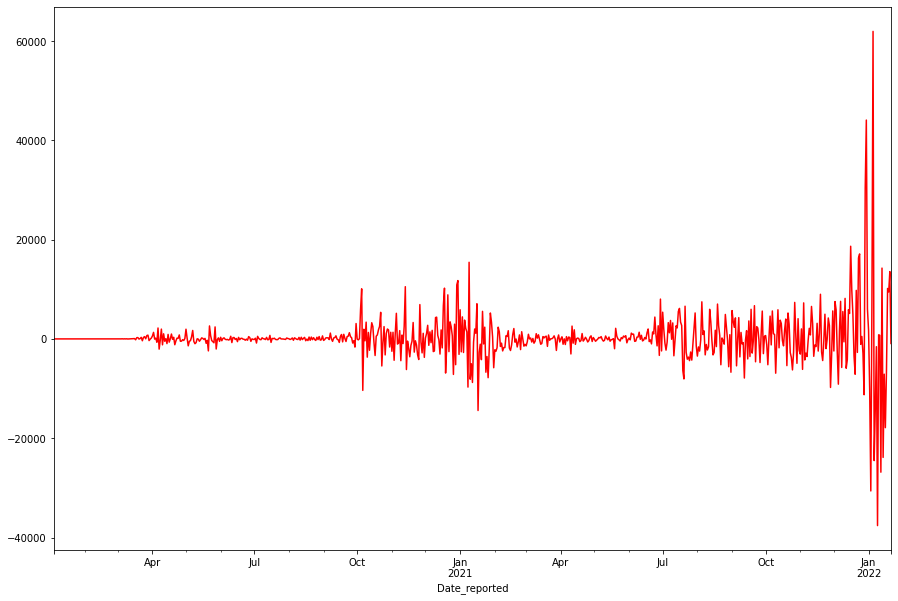

In [79]:
arima_data['difference'].plot(figsize=(15, 10), color='red')